# Problema de Negócio:

📝Qual a chance de um anime ser considerado "excelente" (nota > 8)?

# Importando Libs

In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

# Carregando Dataset

In [172]:
anime = pd.read_csv("animes.csv")


# Analisando os Dados

In [173]:
anime.shape

(15262, 27)

In [174]:
anime.head()

,Japanese,Type,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,...,Favorites,description,Name,English Name,Recommended,Mixed Feelings,Not Recommended,Themes,Demographics,Seasonal
0,葬送のフリーレン,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024",Fall 2023,"Aniplex, Dentsu, Shogakukan-Shueis...","None found, add some",Madhouse,Manga,...,43111,During their decade-long quest to defeat the D...,Sousou no Frieren,Frieren: Beyond Journey's End,493,67,42,['Unknown-Themes'],['Shounen'],False
1,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,"Aniplex, Square Enix, Mainichi Bro...","Funimation, Aniplex of America",Bones,Manga,...,226182,After a horrific alchemy experiment goes wrong...,Fullmetal Alchemist: Brotherhood,NaN,912,59,39,['Military'],['Shounen'],False
2,STEINS;GATE,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,"Frontier Works, Media Factory, Kad...",Funimation,White Fox,Visual novel,...,189734,Eccentric scientist Rintarou Okabe has a never...,Steins;Gate,NaN,1006,73,73,"['Psychological', 'TimeTravel']",['Unknown-Demographic'],True
3,銀魂°,TV,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,...,16680,"Gintoki, Shinpachi, and Kagura return as the f...",Gintama°,Gintama Season 4,79,3,1,"['GagHumor', 'Historical', 'Parody', 'Samurai']",['Shounen'],False
4,進撃の巨人 Season3 Part.2,TV,10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,"Production I.G, Dentsu, Mainichi B...",Funimation,Wit Studio,Manga,...,58793,Seeking to restore humanity's diminishing hope...,Shingeki no Kyojin Season 3 Part 2,Attack on Titan Season 3 Part 2,198,9,11,"['Gore', 'Military', 'Survival']",['Shounen'],True


In [175]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15262 entries, 0 to 15261
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Japanese         15047 non-null  object 
 1   Type             15262 non-null  object 
 2   Episodes         15262 non-null  object 
 3   Status           15262 non-null  object 
 4   Aired            15262 non-null  object 
 5   Premiered        5527 non-null   object 
 6   Producers        15262 non-null  object 
 7   Licensors        15262 non-null  object 
 8   Studios          15253 non-null  object 
 9   Source           15262 non-null  object 
 10  Genres           15262 non-null  object 
 11  Duration         15262 non-null  object 
 12  Rating           15262 non-null  object 
 13  Score            15262 non-null  float64
 14  Ranked           15262 non-null  int64  
 15  Popularity       15262 non-null  int64  
 16  Members          15262 non-null  int64  
 17  Favorites   

🔎Dectando Valores Duplicados

In [176]:
# Verificar se há linhas duplicadas
anime.duplicated().sum()

3

🔎Dectando Valores Ausentes

In [177]:
valAusentes = anime.isnull().sum().sort_values(ascending = False)

print(valAusentes)

Premiered          9735
English Name       8422
Japanese            215
Studios               9
Popularity            0
Demographics          0
Themes                0
Not Recommended       0
Mixed Feelings        0
Recommended           0
Name                  0
description           0
Favorites             0
Members               0
Score                 0
Ranked                0
Type                  0
Rating                0
Duration              0
Genres                0
Source                0
Licensors             0
Producers             0
Aired                 0
Status                0
Episodes              0
Seasonal              0
dtype: int64


In [178]:
# Calculando o percentual de valores ausentes
valores_ausentes_percent = valAusentes[valAusentes > 0] / anime.shape[0] 

print(f'{valores_ausentes_percent * 100} %')

Premiered       63.785873
English Name    55.182807
Japanese         1.408728
Studios          0.058970
dtype: float64 %


> 📄Vamos criar um DataFrame novo e deixar apenas as colunas que precisamos

In [179]:
df_anime = anime[['Score', 'Name', 'Genres']]

df_anime.sample(10)

,Score,Name,Genres
1322,7.661,Shirobako Movie,"['Comedy', 'Drama']"
13455,0.000,Shuimu Juchang 365 Ye Gushi,['Comedy']
4616,6.911,Hoshi no Kirby,"['Action', 'Adventure', 'Comedy', 'Fantasy']"
10331,5.821,Ganbare Goemon: Chikyuu Kyuushutsu Daisakusen,['Comedy']
4522,6.921,UFO Princess Valkyrie 2: Juunigatsu no Yasoukyoku,"['Comedy', 'Romance', 'Sci-Fi']"
11913,5.391,Zekkyou Gakkyuu: Tensei,"['Horror', 'Supernatural']"
10559,5.771,Fudanshi Shoukan: Isekai de Shinjuu ni Hamerar...,"['BoysLove', 'Fantasy']"
5914,6.651,Concrete Revolutio: Choujin Gensou,"['Action', 'Drama', 'Fantasy', 'Mystery', 'Sci..."
10417,5.801,Kerokero Keroppi no Robin Hood,['Fantasy']
9196,6.061,Kageyama Tamio no Double Fantasy,"['Comedy', 'Horror']"


🔎Verificando se tem valores nulos no novo DataFrame

In [180]:
valAusentes = df_anime.isnull().sum().sort_values(ascending = False)

print(valAusentes)

Score     0
Name      0
Genres    0
dtype: int64


🔎Verificando se tem valores duplicados novo DataFrame

In [181]:
# Verificar se há linhas duplicadas
df_anime.duplicated().sum()

3

In [182]:
df_anime[df_anime.duplicated()]

,Score,Name,Genres
6860,6.491,Garouden: The Way of the Lone Wolf,['Action']
10450,5.801,Z/X: Code Reunion,"['Fantasy', 'Sci-Fi']"
10451,5.801,Zegapain ADP,"['Action', 'Romance', 'Sci-Fi']"


# Limpeza e Tratamento dos Dados

> 📄Como encontramos valores duplicados, precisamos trata-los

In [183]:
df_anime.shape

(15262, 3)

In [184]:
#Removendo as duplicatas
df_anime = df_anime.drop_duplicates()

In [185]:
#Verificando se as duplicatas foram removidas
df_anime.duplicated().sum()

0

In [186]:
df_anime.shape

(15259, 3)

# Análise dos Dados

> 📄Vamos verificar se o Score dos animes segue uma distribuição normal

In [187]:
df_anime.describe()

,Score
count,15259.000000
mean,5.683925
std,2.335074
min,0.000000
25%,5.541000
50%,6.351000
75%,7.081000
max,9.361000


In [188]:
# Calcular média e desvio padrão
media = df_anime['Score'].mean()
desvio_padrao = df_anime['Score'].std()

In [189]:
media

5.683924503571663

In [190]:
desvio_padrao

2.335074481998658

In [191]:
df_anime['log_score'] = np.log1p(df_anime['Score'])  # log1p evita problemas com valores 0

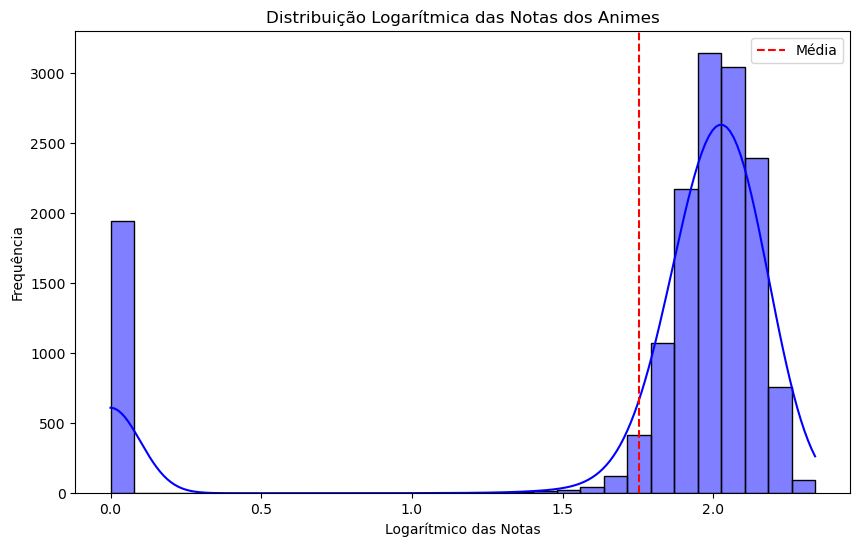

In [192]:
# Histograma da nova distribuição
plt.figure(figsize=(10, 6))
sns.histplot(df_anime['log_score'], bins=30, kde=True, color='blue')
plt.axvline(df_anime['log_score'].mean(), color='red', linestyle='--', label='Média')
plt.title('Distribuição Logarítmica das Notas dos Animes')
plt.xlabel('Logarítmico das Notas')
plt.ylabel('Frequência')
plt.legend()
plt.show()


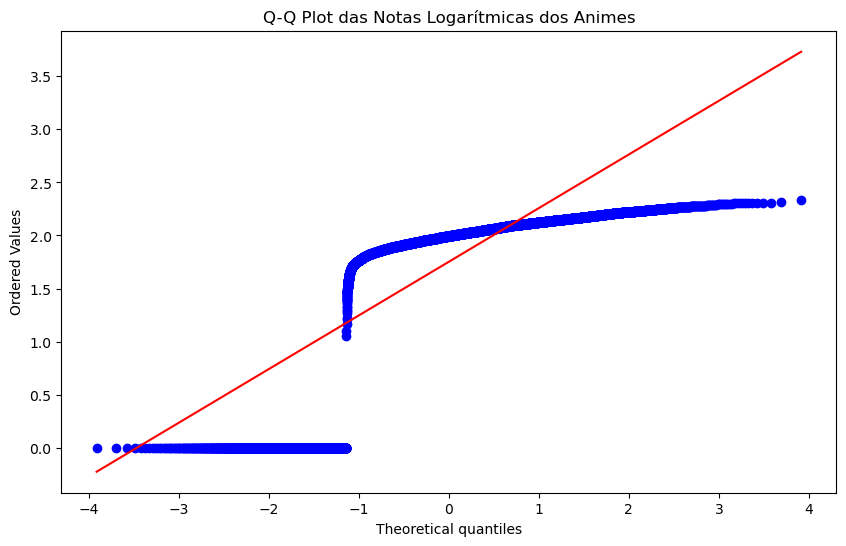

In [193]:
# Gráfico Q-Q
plt.figure(figsize=(10, 6))
stats.probplot(df_anime['log_score'], dist="norm", plot=plt)
plt.title('Q-Q Plot das Notas Logarítmicas dos Animes')
plt.show()


In [194]:
# Calculando o z-score para nota 8
z = (8 - media) / desvio_padrao

# Calculando a probabilidade acumulada (área à esquerda de 8)
p_less_than_8 = norm.cdf(z)

# A probabilidade de ser maior que 8 será o complemento
p_greater_than_8 = 1 - p_less_than_8
print(f"Probabilidade de nota > 8: {p_greater_than_8:.4f}")

Probabilidade de nota > 8: 0.1606


# Conclusão 
📝Qual a chance de um anime ser considerado "excelente" (nota > 8)?

A chance de um anime ser considerado exelente é de aproximadamente 16,06%